In [2]:
# Load trees from .csv files in trees/ directory. Each file its called <model>.csv. I want to load all of them and
# create a NN to predict the model given the tree. The model is a string (name of the file) and the trees are stored as csv (CDV format)

import os
import numpy as np
from ete3 import Tree

class TreeEncoder:

    def encode_tree(self, tree_str):
        """
        Encode the tree structure into a format suitable for input into the neural network.
        """
        # Check if the tree is already encoded
        csv_file = tree_str[:-4] + '_ss.csv'
        if os.path.exists(csv_file):
            return csv_file
        # Call the external script to get SS encoding
        cmd = f"python -m Summary_statistics -t {tree_str} -f {csv_file}" # > {tree_str[:-4]}.csv"
        os.system(cmd)
        

    def encode_all_trees(self, trees_directory):
        """
        Encode all the trees in the given directory.
        """
        tree_files = [os.path.join(trees_directory, file) for file in os.listdir(trees_directory) if file.endswith('.nwk')]
        for tree_file in tree_files:
            print(tree_file)
            self.encode_tree(tree_file)

In [26]:
import sys

trees_directory = "trees/"

ss = "_ss" # "" for cdv, "_ss" for summary statistics

encoder = TreeEncoder()
encoder.encode_all_trees(trees_directory)

trees/bd.nwk
trees/bd_min.nwk
trees/bd_ss_min.nwk
trees/bisse.nwk
trees/bisseness.nwk
trees/bisse_min.nwk
trees/bisse_ss_min.nwk
trees/classe.nwk
trees/classe_2.nwk
trees/classe_2_min.nwk
trees/classe_2_ss_min.nwk
trees/geosse.nwk
trees/geosse_min.nwk
trees/geosse_ss_min.nwk
trees/musse.nwk
trees/musse_500k.nwk
trees/musse_90614.nwk
trees/musse_min.nwk
trees/musse_ss_min.nwk
trees/quasse.nwk


In [27]:
import pandas as pd
import numpy as np

trees_directory = "trees/"

trees = []
target = []

models = ["bd",
          "bisse",
          #"bisseness",
          "classe_2",
          "geosse",
          "musse",
          #"quasse"
          ]

# find the minimum number of trees per model
min_trees = float('inf')
for model_name in models:
    encoding = pd.read_csv(trees_directory + model_name + ss +'.csv', sep='\t', header=None, skiprows=0, index_col=0)
    encoding = encoding.dropna()
    min_trees = min(min_trees, len(encoding))
    print(f"{model_name}: {len(encoding)}")
    
print("Minimum number of trees per model:", min_trees)

# Load min number of trees per model

for model_name in models:
    encoding = pd.read_csv(trees_directory + model_name + ss +'.csv', sep='\t', header=None, skiprows=0, index_col=0)
    # drop nan
    encoding = encoding.dropna()
    encoding = encoding.sample(min_trees)
    trees.append(encoding)
    target.append(np.array([model_name] * min_trees))
    
assert len(trees) == len(target)

print("Number of trees per model:")
for model, tree in zip(models, trees):
    print(f"{model}: {len(tree)}")
    
# Concatenate all the trees and targets
trees = pd.concat(trees)
target = np.concatenate(target)

print("Number of trees in total:", len(trees))
print("Number of targets in total:", len(target))

trees

bd: 7787
bisse: 6205
classe_2: 18447
geosse: 17135
musse: 78216
Minimum number of trees per model: 6205
Number of trees per model:
bd: 6205
bisse: 6205
classe_2: 6205
geosse: 6205
musse: 6205
Number of trees in total: 31025
Number of targets in total: 31025


,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,98
0,,,,,,,,,,,,,,,,,,,,,
6835.0,11.332924,1.0,0.657978,1.148746,0.931429,0.624193,1.020498,0.761946,0.543489,0.418280,...,2.232355,2.517110,2.892019,3.423569,4.112843,4.872900,9.568034,2.470937,943,0.968290
4345.0,20.330303,1.0,0.537314,1.690940,0.782959,0.414665,1.093956,3.255133,3.318275,6.175492,...,2.191350,2.742412,3.206155,3.794058,5.054579,6.451550,13.773141,6.076439,422,1.013697
3734.0,9.549350,1.0,0.686571,1.041756,0.992063,0.681017,1.054394,0.664637,0.579327,0.304305,...,2.301221,2.617439,2.917731,3.239528,3.844116,4.926478,6.252364,1.968850,547,0.809781
465.0,15.634403,1.0,0.664867,1.112586,0.947534,0.606345,1.100862,1.605636,1.698904,1.066008,...,2.175746,2.560016,2.985747,3.255344,3.693411,4.848959,9.798566,2.535062,882,1.262094
3771.0,17.996226,1.0,0.530943,2.025758,0.691734,0.385461,0.729158,2.385496,2.385496,5.690590,...,2.114591,2.239980,2.628939,3.385552,4.596382,5.657516,11.996239,5.148823,166,0.990354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128056.0,11.656417,1.0,0.626728,1.163578,0.942036,0.576521,1.141118,1.079463,0.774115,1.043516,...,2.125480,2.603990,2.955519,3.523885,4.451003,5.778265,8.040035,3.393207,344,1.921165
130223.0,8.298027,1.0,0.766837,0.875287,1.072781,0.832420,0.917908,0.833388,0.726867,0.444867,...,1.997186,2.237832,2.669858,2.806823,2.903713,3.739689,4.631621,0.756996,145,1.680621
103185.0,13.697695,1.0,0.660547,1.153613,0.929896,0.592765,1.042923,0.695353,0.509337,0.529090,...,2.231202,2.605027,2.960719,3.380584,3.985336,5.002100,9.015338,2.568009,971,2.955658


In [31]:
print(trees.shape)
print(target.shape)

(31025, 98)
(31025,)


In [32]:
# Save the data
trees.to_csv("trees" + ss + ".csv")
print(trees.shape)
np.save("target" + ss + ".npy", target)
print(target.shape)

(31025, 98)
(31025,)


In [44]:
print(min_trees)
# from nwk files, load only min_trees trees per model and save them in another nwk file, sampling 20% of the trees
test_limit = int(0.2 * min_trees)

for model_name in models:
    with open(trees_directory + model_name + '.nwk', 'r') as f:
        lines = f.readlines()
        with open(trees_directory + model_name + ss + '_min.nwk', 'w') as f_min:
            for i in range(test_limit):
                f_min.write(lines[i])



6205


In [45]:
import pandas as pd
import numpy as np


# Load the data
trees = pd.read_csv("trees_ss.csv", index_col=0)
target = np.load("target.npy")

In [46]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(trees, target, test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Train an advanced model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1, verbose=1, max_depth=100)
start = time.time()
history = model.fit(X_train, y_train)
duration = time.time() - start
print("Training duration:", duration, "seconds")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


                  1    2         3         4         5         6         7  \
0                                                                            
9283.0    10.630344  1.0  0.579781  1.764766  0.803101  0.369331  1.577262   
11345.0   11.724400  1.0  0.685376  1.069644  0.957106  0.628750  0.933755   
139939.0   6.700212  1.0  0.439953  1.717317  1.072426  0.395652  2.372497   
3783.0     7.493874  1.0  0.629392  1.161792  0.977160  0.574734  1.309858   
1148.0    15.465009  1.0  0.598444  1.436122  0.873223  0.540249  0.935800   
...             ...  ...       ...       ...       ...       ...       ...   
136006.0  15.498867  1.0  0.583616  1.573330  0.817253  0.479630  1.107514   
3005.0    10.029846  1.0  0.706084  0.926561  1.045566  0.760730  0.929788   
1434.0    12.147498  1.0  0.722541  0.961491  0.967239  0.686999  0.919219   
14602.0   10.886687  1.0  0.739341  0.863728  1.020849  0.785336  0.770491   
3324.0    13.157989  1.0  0.607664  1.271224  0.847481  0.497824

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


Training duration: 17.944659948349 seconds


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.2s


Accuracy: 0.6676873489121676


[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:    0.3s finished


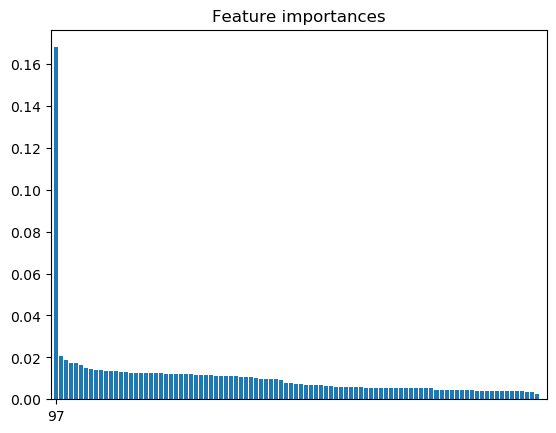

Feature 97: 0.1679874923806978
Feature 20: 0.020578519743351554
Feature 3: 0.018859560977324958
Feature 85: 0.017409597183481527
Feature 2: 0.01722319910549147
Feature 86: 0.016226319804479458
Feature 23: 0.015108270350013556
Feature 87: 0.014676450337164991
Feature 21: 0.014094693961411716
Feature 32: 0.0139872190162113


In [47]:
# plot the feature importances
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
# show only the first 3 xticks
plt.xticks(range(1), indices[:1])
plt.xlim([-1, X_train.shape[1]])
plt.show()

# print first 10 feature importances
for i in range(10):
    print(f"Feature {indices[i]}: {importances[indices[i]]}")

In [48]:
#  Save the model
import pickle

with open("forest"+ ss + str(int((accuracy)*100)) + ".pkl", "wb") as f:
    pickle.dump(history, f)

In [49]:
# Create another NN model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(1000, 1000), max_iter=1000, random_state=42)
history = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# save the model
with open("nn"+ ss + str(int((accuracy)*100)) + ".pkl", "wb") as f:
    pickle.dump(model, f)

Accuracy: 0.44157937147461723


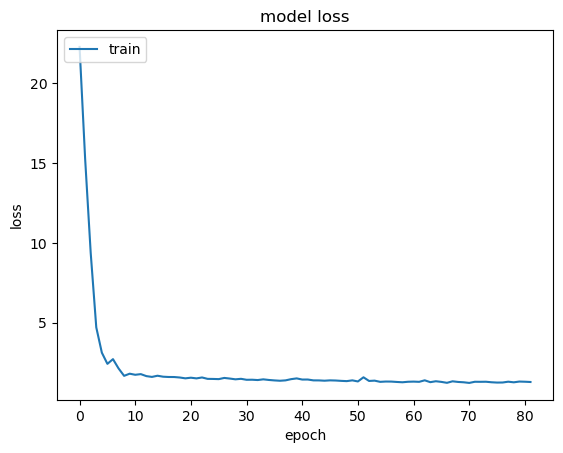

In [50]:
# plot history
plt.plot(history.loss_curve_)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [51]:
# Create a DNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, input_shape=(input_shape,), activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [52]:
# build the model

# convert the target to integers
from sklearn.preprocessing import LabelEncoder
target_int = LabelEncoder().fit_transform(target)
print(target_int)
print(len(set(target_int)))

model = create_model(X_train.shape[1], len(set(target_int)))
model.summary()

# early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

Y_train = LabelEncoder().fit_transform(y_train)
# train the model and save the history
with tf.device('/GPU:0'):
    history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# save the model
model.save("dnn" + ss + str(int((accuracy)*100)) + ".h5")

[0 0 0 ... 4 4 4]
5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               9900      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 505       
Total params: 30,605
Trainable params: 30,605
Non-trainable params: 0
_________________________________________________________________
Train on 19856 samples, validate on 4964 samples
Epoch 1/100
19856/19856 [==============================] - 1s 53us/sample - loss: 12.8524 - acc: 0.2026 - val_loss: 13.0042 - val_acc: 0.1932
Epoch 2/100
19856/19856 [==============================] - 

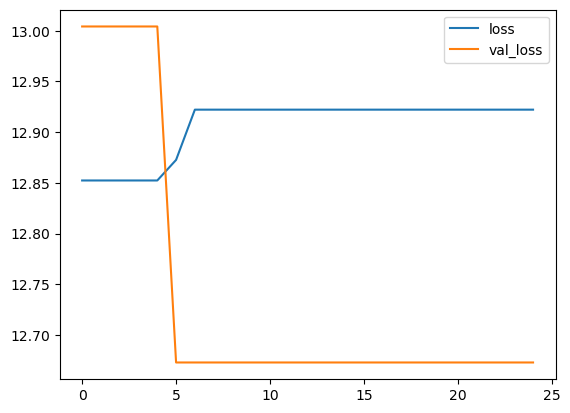

In [53]:
# plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [54]:
# test the model
Y_test = LabelEncoder().fit_transform(y_test)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)

6205/6205 [==============================] - 0s 14us/sample - loss: 12.9828 - acc: 0.1945
Accuracy: 0.19452055


In [55]:
# CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.Conv1D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    adam = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-5)
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model(X_train.shape[1], len(set(target_int)))
model.summary()

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# train the model and save the history
with tf.device('/GPU:0'):
    history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, batch_size=128, callbacks=[early_stop])
    
# print the accuracy
Y_test = LabelEncoder().fit_transform(y_test)
_, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)
    
# save the model
model.save("cnn"+ ss + str(int((accuracy)*100)) + ".h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 98, 1)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 32)            128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 46, 64)            6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 21, 128)           24704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 128)           0         
__________

  32/6205 [..............................] - ETA: 0s - loss: 14.1033 - acc: 0.1250

6205/6205 [==============================] - 1s 86us/sample - loss: 12.9099 - acc: 0.1971
Accuracy: 0.19709912


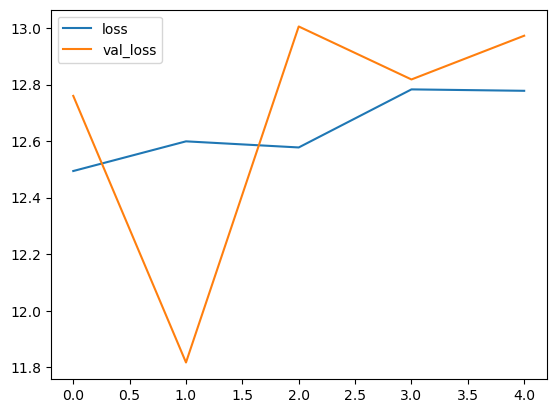

In [56]:
Y_test = LabelEncoder().fit_transform(y_test)
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)

# Plot the model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Random Forest Accuracy: 0.7005640612409347


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:    0.7s finished


6205/6205 [==============================] - 1s 134us/sample - loss: 11.0915 - acc: 0.1929


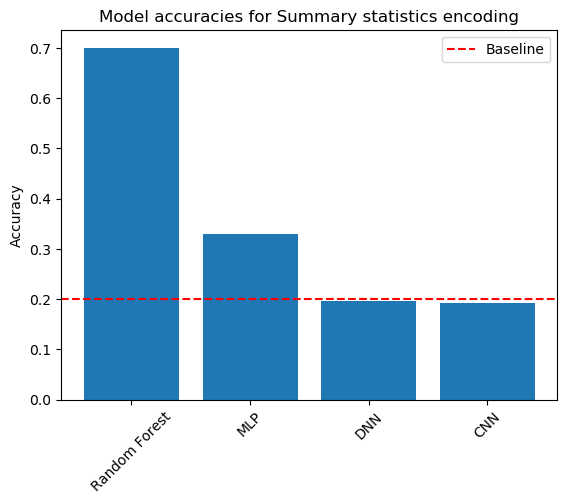

[0.7005640612409347, 0.33021756647864625, 0.19709912, 0.19290894]


In [34]:
# Maximum-Likelihood Phylogenetic Inference

ss = "_ss"

# test all the models and compare the accuracies in a bar plot
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
trees = pd.read_csv("trees" + ss + ".csv", index_col=0)
target = np.load("target" + ss + ".npy")

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(trees, target, test_size=0.2, random_state=42)

# Load all the models
models = []

# Random Forest
# read the model
with open("forest" + ss + str(56) + ".pkl", "rb") as f:
    model = pickle.load(f)
    models.append(model)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print("Random Forest Accuracy:", accuracy)
    
# MLP
# read the model
with open("nn" + ss + str(32) + ".pkl", "rb") as f:
    model = pickle.load(f)
    models.append(model)
    
# Deep Neural Network
# read the model
model = load_model("dnn" + ss + str(32) + ".h5")
models.append(model)

# Convolutional Neural Network
# read the model
model = load_model("cnn" + ss + str(18) + ".h5")
models.append(model)

# Baseline: Random guessing: 1/5 = 20%


        
# Evaluate all the models
accuracies = []
for model in models:
    if isinstance(model, RandomForestClassifier) or isinstance(model, MLPClassifier):
        accuracies.append(accuracy_score(y_test, model.predict(X_test)))
    elif isinstance(model, tf.keras.models.Model):
        accuracies.append(model.evaluate(X_test, LabelEncoder().fit_transform(y_test))[1])
        
names = ["Random Forest", "MLP", "DNN", "CNN"]
# Plot the accuracies
plt.bar(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), names, rotation=45)
plt.ylabel('Accuracy')
encod = "CDV" if ss == "" else "Summary statistics"
plt.title('Model accuracies for ' + encod + ' encoding')
# horizontal line for the baseline
plt.axhline(y=0.2, color='r', linestyle='--', label='Baseline')
plt.legend()
plt.show()

print(accuracies)

accuracies_ss = accuracies


trees shape: (31255, 1002)
target shape: (31255,)


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Random Forest Accuracy: 0.8796992481203008


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:    0.5s finished


6251/6251 [==============================] - 2s 379us/sample - loss: 1.4246 - acc: 0.4243


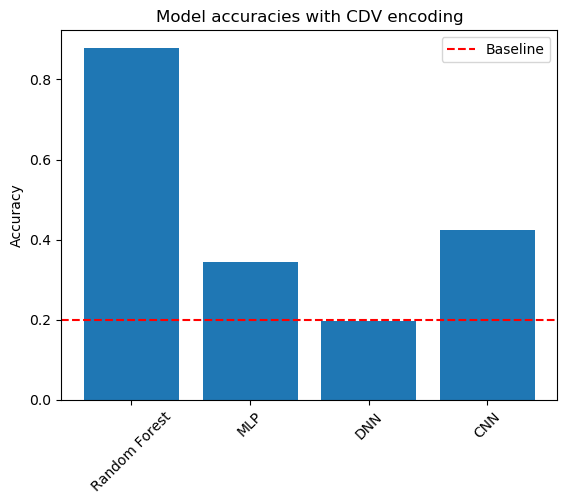

In [37]:
# Maximum-Likelihood Phylogenetic Inference

ss = "" # CDV

# test all the models and compare the accuracies in a bar plot
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
trees = pd.read_csv("trees" + ss + ".csv", index_col=0)
target = np.load("target" + ss + ".npy")

print("trees shape:", trees.shape)
print("target shape:", target.shape)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(trees, target, test_size=0.2, random_state=42)

# Load all the models
models = []

# Random Forest
# read the model
with open("forest" + ss + str(61) + ".pkl", "rb") as f:
    model = pickle.load(f)
    models.append(model)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print("Random Forest Accuracy:", accuracy)
    
# MLP
# read the model
with open("nn" + ss + str(33) + ".pkl", "rb") as f:
    model = pickle.load(f)
    models.append(model)
    
# Deep Neural Network
# read the model
model = load_model("dnn" + ss + str(26) + ".h5")
models.append(model)

# Convolutional Neural Network
# read the model
model = load_model("cnn" + ss + str(28) + ".h5")
models.append(model)

# Baseline: Random guessing: 1/5 = 20%


        
# Evaluate all the models
accuracies = []
for model in models:
    if isinstance(model, RandomForestClassifier) or isinstance(model, MLPClassifier):
        accuracies.append(accuracy_score(y_test, model.predict(X_test)))
    elif isinstance(model, tf.keras.models.Model):
        accuracies.append(model.evaluate(X_test, LabelEncoder().fit_transform(y_test))[1])
        
names = ["Random Forest", "MLP", "DNN", "CNN"]
# Plot the accuracies
plt.bar(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), names, rotation=45)
plt.ylabel('Accuracy')
encod = "CDV" if ss == "" else "Summary statistics"
plt.title('Model accuracies with '+ encod +' encoding')
# horizontal line for the baseline
plt.axhline(y=0.2, color='r', linestyle='--', label='Baseline')
plt.legend()
plt.show()


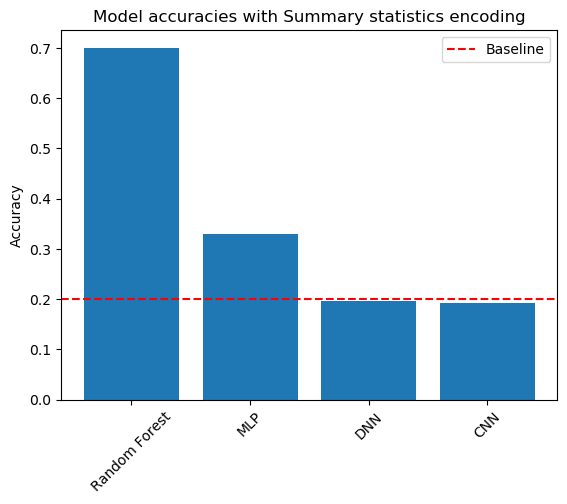

[0.7005640612409347, 0.33021756647864625, 0.19709912, 0.19290894]


In [35]:
plt.bar(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), names, rotation=45)
plt.ylabel('Accuracy')
encod = "CDV" if ss == "" else "Summary statistics"
plt.title('Model accuracies with '+ encod +' encoding')
# horizontal line for the baseline
plt.axhline(y=0.2, color='r', linestyle='--', label='Baseline')
plt.legend()
plt.show()
print(accuracies)